# Safety Visualizations 

### import packages:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd

## COVID-19 Vaccinations Mapping

### data wrangling:

Include only the latest data possible for each country, and clean up the dataframe to only include relevant data.

It should be noted that OWID has a separate, pre-cleaned dataset for vaccinations as well. However, this dataset does not include population data, which we want to include in order to calculate percentages. Thus, here we choose to simply import and clean the entire dataset.

In [2]:
df_covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
vaccinations = df_covid[['continent', 'location', 'iso_code','people_vaccinated', 'people_fully_vaccinated', 'people_vaccinated_per_hundred',
                    'people_fully_vaccinated_per_hundred', 'population', 'date']]
vaccinations.head()

,continent,location,iso_code,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date
0,Asia,Afghanistan,AFG,NaN,NaN,NaN,NaN,41128772.0,2020-02-24
1,Asia,Afghanistan,AFG,NaN,NaN,NaN,NaN,41128772.0,2020-02-25
2,Asia,Afghanistan,AFG,NaN,NaN,NaN,NaN,41128772.0,2020-02-26
3,Asia,Afghanistan,AFG,NaN,NaN,NaN,NaN,41128772.0,2020-02-27
4,Asia,Afghanistan,AFG,NaN,NaN,NaN,NaN,41128772.0,2020-02-28


In [3]:
latest_vaccinations = vaccinations.sort_values('date', na_position='last').dropna().drop_duplicates(subset=['iso_code'], keep='last')
latest_vaccinations.head()

,continent,location,iso_code,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date
125888,Europe,Luxembourg,LUX,103568.0,37868.0,15.99,5.85,647601.0,2021-04-13
71984,South America,Falkland Islands,FLK,2632.0,1775.0,69.24,46.70,3801.0,2021-04-14
178171,Africa,Saint Helena,SHN,4361.0,3531.0,80.74,65.38,5401.0,2021-05-05
32582,Europe,Bulgaria,BGR,1089066.0,1087102.0,16.06,16.03,6781955.0,2021-08-17
26650,North America,Bonaire Sint Eustatius and Saba,BES,19109.0,16736.0,70.64,61.87,27052.0,2021-09-01


In [35]:
latest_vaccinations['proportion_vaccinated'] = latest_vaccinations['people_vaccinated'] / latest_vaccinations['population']
latest_vaccinations['percentage_vaccinated'] = latest_vaccinations['proportion_vaccinated'] * 100
latest_vaccinations.head()

,continent,location,iso_code,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date,proportion_vaccinated,percentage_vaccinated
125888,Europe,Luxembourg,LUX,103568.0,37868.0,15.99,5.85,647601.0,2021-04-13,0.159926,15.992563
71984,South America,Falkland Islands,FLK,2632.0,1775.0,69.24,46.70,3801.0,2021-04-14,0.692449,69.244936
178171,Africa,Saint Helena,SHN,4361.0,3531.0,80.74,65.38,5401.0,2021-05-05,0.807443,80.744307
32582,Europe,Bulgaria,BGR,1089066.0,1087102.0,16.06,16.03,6781955.0,2021-08-17,0.160583,16.058290
26650,North America,Bonaire Sint Eustatius and Saba,BES,19109.0,16736.0,70.64,61.87,27052.0,2021-09-01,0.706380,70.638030


#### Import GeoJson file for world map:

I was unfortunately unable to find a world map that includes every territory and sovereign state included in the OWID dataset. However, I was able to find one that covers most locations, aside from small territories mostly under the United Kingdom. It also happens that this GeoJson file was originally used for COVID-19 data as well, about 3 years ago.

In [36]:
url = 'https://raw.githubusercontent.com/Research-Squirrel-Engineers/COVID-19/master/geojson/world_h.geojson'
world = gpd.read_file(url)
world.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,0,Admin-0 country,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,ALB.geojson,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."
1,0,Admin-0 country,6,Andorra,AND,0,2,Sovereign country,Andorra,AND,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,5,1,AND.geojson,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ..."
2,3,Admin-0 country,6,Finland,FI1,1,2,Country,Aland,ALD,...,Europe,Northern Europe,Europe & Central Asia,5,13,5,5,-99,ALA.geojson,"MULTIPOLYGON (((20.92018 59.90925, 20.91236 59..."
3,0,Admin-0 country,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,AUT.geojson,"POLYGON ((15.16179 48.93722, 15.23807 48.95076..."
4,0,Admin-0 country,2,Belgium,BEL,0,2,Sovereign country,Belgium,BEL,...,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,BEL.geojson,"POLYGON ((4.81545 51.43107, 4.82268 51.41368, ..."


In [37]:
world = world[['iso_a3', 'name', 'geometry', 'continent']]
world.head()

,iso_a3,name,geometry,continent
0,ALB,Albania,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",Europe
1,AND,Andorra,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",Europe
2,ALA,Aland,"MULTIPOLYGON (((20.92018 59.90925, 20.91236 59...",Europe
3,AUT,Austria,"POLYGON ((15.16179 48.93722, 15.23807 48.95076...",Europe
4,BEL,Belgium,"POLYGON ((4.81545 51.43107, 4.82268 51.41368, ...",Europe


<AxesSubplot: >

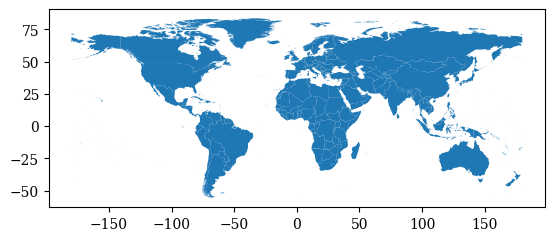

In [38]:
world.plot()

check which ISO codes were not included (the OWID dataset seem to have different codes for a couple countries)

In [39]:
iso_not_included = [iso for iso in list(latest_vaccinations['iso_code']) if iso not in list(world['iso_a3'])]
print(iso_not_included, len(iso_not_included))


['SHN', 'BES', 'OWID_CYN', 'OWID_SCT', 'TKL', 'MUS', 'SYC', 'NOR', 'OWID_WLS', 'OWID_ENG', 'MDV', 'OWID_NIR', 'FRA', 'OWID_KOS'] 14


In [40]:
rows_not_included = latest_vaccinations[latest_vaccinations['iso_code'].isin(iso_not_included)]
rows_not_included

,continent,location,iso_code,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date,proportion_vaccinated,percentage_vaccinated
178171,Africa,Saint Helena,SHN,4361.0,3531.0,80.74,65.38,5401.0,2021-05-05,0.807443,80.744307
26650,North America,Bonaire Sint Eustatius and Saba,BES,19109.0,16736.0,70.64,61.87,27052.0,2021-09-01,0.706380,70.638030
158468,Asia,Northern Cyprus,OWID_CYN,284357.0,275988.0,74.28,72.09,382836.0,2021-11-26,0.742765,74.276453
187303,Europe,Scotland,OWID_SCT,4549556.0,4285946.0,83.23,78.41,5466000.0,2022-09-11,0.832337,83.233736
214361,Oceania,Tokelau,TKL,1494.0,1494.0,78.92,78.92,1893.0,2022-10-24,0.789223,78.922345
136395,Africa,Mauritius,MUS,1123773.0,1088142.0,86.48,83.74,1299478.0,2022-11-13,0.864788,86.478801
190360,Africa,Seychelles,SYC,85720.0,81574.0,80.01,76.14,107135.0,2022-11-13,0.800112,80.011201
161069,Europe,Norway,NOR,4346995.0,4054726.0,79.99,74.61,5434324.0,2022-11-13,0.799915,79.991458
233725,Europe,Wales,OWID_WLS,2590069.0,2467597.0,81.71,77.84,3170000.0,2022-11-16,0.817056,81.705647
63540,Europe,England,OWID_ENG,45351924.0,42842246.0,80.20,75.76,56550000.0,2022-11-20,0.801979,80.197920


In [41]:
name_not_included = [name for name in list(rows_not_included['location']) if name not in list(world['name'])]
print(name_not_included, len(name_not_included))

['Saint Helena', 'Bonaire Sint Eustatius and Saba', 'Northern Cyprus', 'Scotland', 'Tokelau', 'Mauritius', 'Seychelles', 'Wales', 'England', 'Maldives', 'Northern Ireland'] 11


after finding which locations have different ISO codes but were still present in the world map, match them to each other 

In [42]:
for idx, row in rows_not_included.iterrows():
    if not world[world['name'] == row['location']].empty:
        index = world[world['name'] == row['location']].index.tolist()[0]
        world.at[index, 'iso_a3'] = row['iso_code']

In [43]:
iso_not_included = [iso for iso in list(latest_vaccinations['iso_code']) if iso not in list(world['iso_a3'])]
print(iso_not_included, len(iso_not_included))


['SHN', 'BES', 'OWID_CYN', 'OWID_SCT', 'TKL', 'MUS', 'SYC', 'OWID_WLS', 'OWID_ENG', 'MDV', 'OWID_NIR'] 11


There are 11 remaining locations that are not able to be mapped. Most of these territories are under the United Kingdom, however United Kingdom exists as a standalone data point in the OWID dataset. It is unclear whether or not these territories are already included in that count. Thus, the safest option is to simply omit these data points.

#### Merging dataframes

Before we do that, we rename the "iso_a3" column to "iso_code" to match our original dataframe. We will also remove the name and continent columns as that will no longer be necessary.

In [44]:
world = world[['iso_a3', 'geometry']]
world = world.rename(columns = {'iso_a3': 'iso_code'})
world.head()

,iso_code,geometry
0,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."
1,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ..."
2,ALA,"MULTIPOLYGON (((20.92018 59.90925, 20.91236 59..."
3,AUT,"POLYGON ((15.16179 48.93722, 15.23807 48.95076..."
4,BEL,"POLYGON ((4.81545 51.43107, 4.82268 51.41368, ..."


In [45]:
merged_df = world.merge(latest_vaccinations, on = 'iso_code', how = 'left')
merged_df.head()

,iso_code,geometry,continent,location,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date,proportion_vaccinated,percentage_vaccinated
0,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",Europe,Albania,1340678.0,1268200.0,47.17,44.62,2842318.0,2022-11-13,0.471685,47.168473
1,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",Europe,Andorra,57901.0,53485.0,72.52,66.99,79843.0,2022-11-13,0.725186,72.518568
2,ALA,"MULTIPOLYGON (((20.92018 59.90925, 20.91236 59...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUT,"POLYGON ((15.16179 48.93722, 15.23807 48.95076...",Europe,Austria,6824915.0,6822616.0,76.34,76.32,8939617.0,2022-01-31,0.763446,76.344602
4,BEL,"POLYGON ((4.81545 51.43107, 4.82268 51.41368, ...",Europe,Belgium,9262660.0,9165219.0,79.47,78.63,11655923.0,2022-11-26,0.794674,79.467409


finishing touches:

In [46]:
gdf = gpd.GeoDataFrame(merged_df, geometry = 'geometry')
gdf.head()

,iso_code,geometry,continent,location,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date,proportion_vaccinated,percentage_vaccinated
0,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",Europe,Albania,1340678.0,1268200.0,47.17,44.62,2842318.0,2022-11-13,0.471685,47.168473
1,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",Europe,Andorra,57901.0,53485.0,72.52,66.99,79843.0,2022-11-13,0.725186,72.518568
2,ALA,"MULTIPOLYGON (((20.92018 59.90925, 20.91236 59...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUT,"POLYGON ((15.16179 48.93722, 15.23807 48.95076...",Europe,Austria,6824915.0,6822616.0,76.34,76.32,8939617.0,2022-01-31,0.763446,76.344602
4,BEL,"POLYGON ((4.81545 51.43107, 4.82268 51.41368, ...",Europe,Belgium,9262660.0,9165219.0,79.47,78.63,11655923.0,2022-11-26,0.794674,79.467409


### Visualizing Data

(-197.9999999999999, 198.00000000000017, -62.896134466799786, 90.6117308968001)

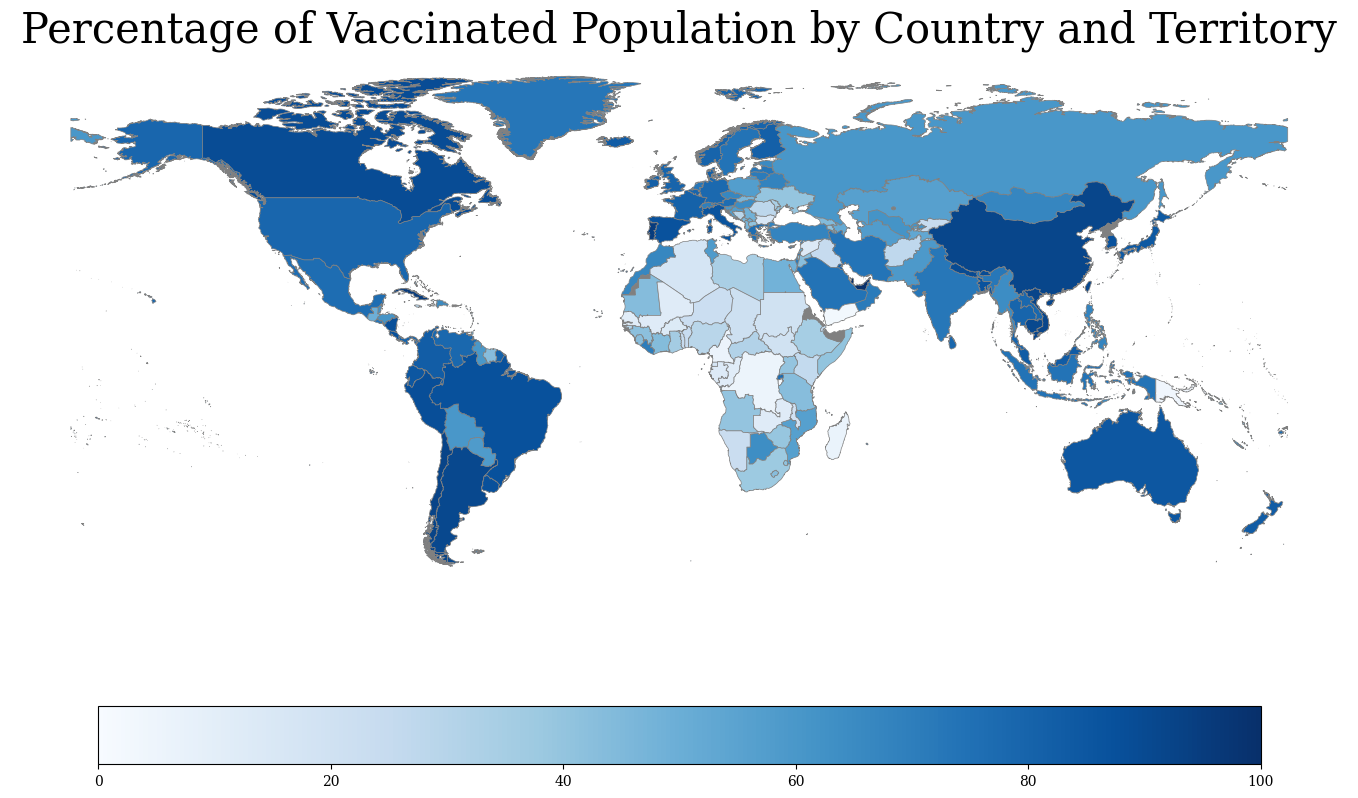

In [59]:
missing_kwds = dict(color='grey', label='No Data')

vmin, vmax = 0, 100
ax = gdf.plot(column = 'percentage_vaccinated',
                edgecolor='grey',
                linewidth=0.5,
                cmap = 'Blues', figsize=(50, 10),
                legend=True, vmin=vmin, vmax=vmax,
                missing_kwds=missing_kwds,
                legend_kwds={'location':'bottom', 'orientation':'horizontal', 'shrink':0.3}
                    )
ax.set_title('Percentage of Vaccinated Population by Country and Territory', fontdict={'fontsize':'30', 'fontweight':'3'})
ax.axis('off')

In [60]:
merged_df.sort_values('proportion_vaccinated', na_position='last', ascending = False).head(20)

,iso_code,geometry,continent,location,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date,proportion_vaccinated,percentage_vaccinated
17,GIB,"POLYGON ((-5.35839 36.14111, -5.33877 36.14112...",Europe,Gibraltar,4.207400e+04,4.142100e+04,128.76,126.76,3.267700e+04,2022-04-21,1.287572,128.757230
106,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...",Asia,United Arab Emirates,9.991089e+06,9.792266e+06,105.83,103.72,9.441138e+06,2022-06-20,1.058250,105.825050
146,QAT,"POLYGON ((51.21526 24.62585, 51.14745 24.57628...",Asia,Qatar,2.848950e+06,2.848949e+06,105.71,105.71,2.695131e+06,2022-11-20,1.057073,105.707292
112,BRN,"MULTIPOLYGON (((115.13453 4.90884, 115.14584 4...",Asia,Brunei,4.502870e+05,4.457860e+05,100.29,99.28,4.490020e+05,2022-11-11,1.002862,100.286190
232,PCN,"MULTIPOLYGON (((-130.08625 -25.07513, -130.095...",Oceania,Pitcairn,4.700000e+01,4.700000e+01,100.00,100.00,4.700000e+01,2022-08-29,1.000000,100.000000
68,CUB,"MULTIPOLYGON (((-78.38419 20.56216, -78.36726 ...",North America,Cuba,1.071461e+07,1.000101e+07,95.56,89.20,1.121220e+07,2022-11-26,0.955621,95.562083
40,PRT,"MULTIPOLYGON (((-16.02310 30.03229, -16.02302 ...",Europe,Portugal,9.767395e+06,8.880444e+06,95.10,86.46,1.027086e+07,2022-11-18,0.950982,95.098150
140,MAC,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...",Asia,Macao,6.512820e+05,6.264650e+05,93.69,90.12,6.951800e+05,2022-11-23,0.936854,93.685376
111,CHL,"MULTIPOLYGON (((-67.25609 -55.82887, -67.24511...",South America,Chile,1.807946e+07,1.769190e+07,92.22,90.25,1.960374e+07,2022-11-28,0.922246,92.224584
118,HKG,"MULTIPOLYGON (((114.11744 22.22187, 114.12574 ...",Asia,Hong Kong,6.899337e+06,6.764690e+06,92.13,90.33,7.488863e+06,2022-11-27,0.921280,92.127964


In [61]:
top_pop = merged_df[merged_df['location'].isin(['China', 'India', 'United States', 'Indonesia', 'Pakistan'])]
top_pop

,iso_code,geometry,continent,location,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date,proportion_vaccinated,percentage_vaccinated
119,CHN,"MULTIPOLYGON (((111.20460 15.77924, 111.19654 ...",Asia,China,1.304631e+09,1.272830e+09,91.50,89.27,1.425887e+09,2022-11-28,0.914961,91.496077
123,IND,"MULTIPOLYGON (((93.85532 7.21418, 93.86500 7.2...",Asia,India,1.027037e+09,9.507285e+08,72.47,67.09,1.417173e+09,2022-11-28,0.724708,72.470799
126,USA,"MULTIPOLYGON (((-155.60652 20.13796, -155.5863...",North America,United States,2.678049e+08,2.283904e+08,80.66,68.79,3.382899e+08,2022-11-22,0.791643,79.164337
130,IDN,"MULTIPOLYGON (((121.59742 -10.60117, 121.61411...",Asia,Indonesia,2.044194e+08,1.712296e+08,74.20,62.15,2.755013e+08,2022-11-22,0.741991,74.199055
148,PAK,"MULTIPOLYGON (((67.47779 24.05121, 67.48536 24...",Asia,Pakistan,1.396217e+08,1.322636e+08,59.21,56.09,2.358249e+08,2022-11-28,0.592057,59.205665


In [62]:
top_tourist = merged_df[merged_df['location'].isin(['France', 'Spain', 'United States', 'China', 'Italy'])]
top_tourist

,iso_code,geometry,continent,location,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population,date,proportion_vaccinated,percentage_vaccinated
15,FRA,"MULTIPOLYGON (((55.50131 -20.87322, 55.51401 -...",Europe,France,5.460759e+07,5.310882e+07,80.53,78.32,6.781300e+07,2022-11-27,0.805267,80.526728
18,ESP,"MULTIPOLYGON (((-17.88512 27.79792, -17.92642 ...",Europe,Spain,4.131069e+07,4.065764e+07,86.86,85.49,4.755863e+07,2022-10-13,0.868627,86.862660
31,ITA,"MULTIPOLYGON (((12.62127 35.49234, 12.61109 35...",Europe,Italy,5.085759e+07,4.797285e+07,86.14,81.26,5.903747e+07,2022-11-28,0.861446,86.144595
119,CHN,"MULTIPOLYGON (((111.20460 15.77924, 111.19654 ...",Asia,China,1.304631e+09,1.272830e+09,91.50,89.27,1.425887e+09,2022-11-28,0.914961,91.496077
126,USA,"MULTIPOLYGON (((-155.60652 20.13796, -155.5863...",North America,United States,2.678049e+08,2.283904e+08,80.66,68.79,3.382899e+08,2022-11-22,0.791643,79.164337


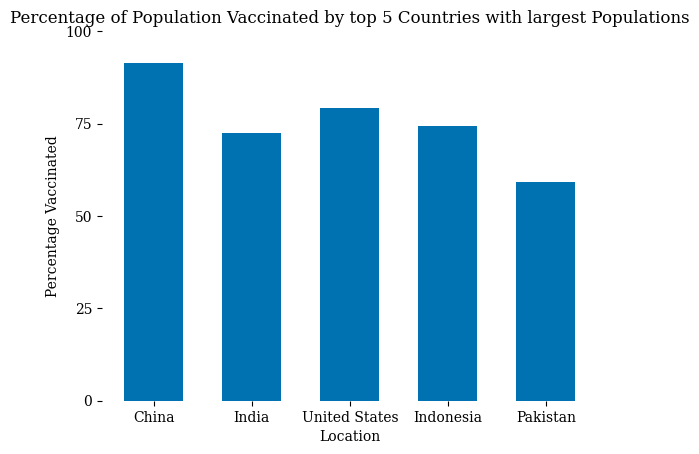

In [82]:
# colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
# sns.set_palette(sns.color_palette(colors))
plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots()
ax.bar(top_pop['location'], top_pop['percentage_vaccinated'], color= "#0072B2", width=0.6)
y_ticks = [0, 25, 50, 75, 100]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks)

ax.set_title('Percentage of Population Vaccinated by top 5 Countries with largest Populations')
ax.set_xlabel('Location')
ax.set_ylabel('Percentage Vaccinated')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

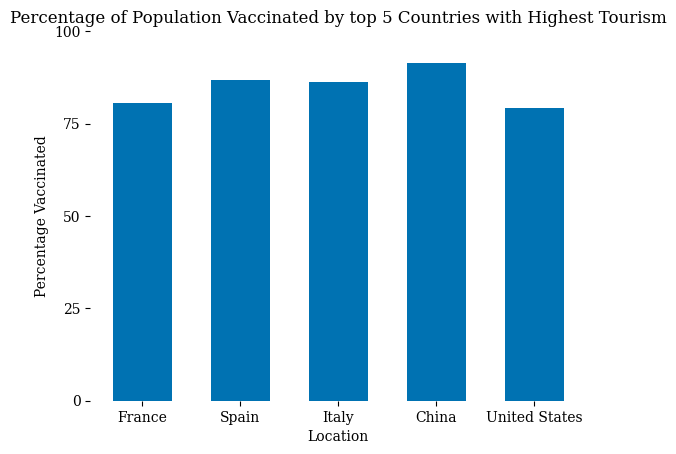

In [83]:
fig, ax = plt.subplots()
ax.bar(top_tourist['location'], top_tourist['percentage_vaccinated'], color= "#0072B2", width=0.6)
y_ticks = [0, 25, 50, 75, 100]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks)

ax.set_title('Percentage of Population Vaccinated by top 5 Countries with Highest Tourism')
ax.set_xlabel('Location')
ax.set_ylabel('Percentage Vaccinated')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

## Unruly Passengers

In [22]:
df_unruly = pd.read_csv('unruly_passengers_data.csv')
df_unruly = df_unruly.replace(',','', regex=True)
df_unruly['investigations initiated'] = df_unruly['investigations initiated'].astype('int64')
df_unruly.head()

,year,investigations initiated
0,1995,146
1,1996,184
2,1997,237
3,1998,204
4,1999,226


Text(0, 0.5, 'Investigations')

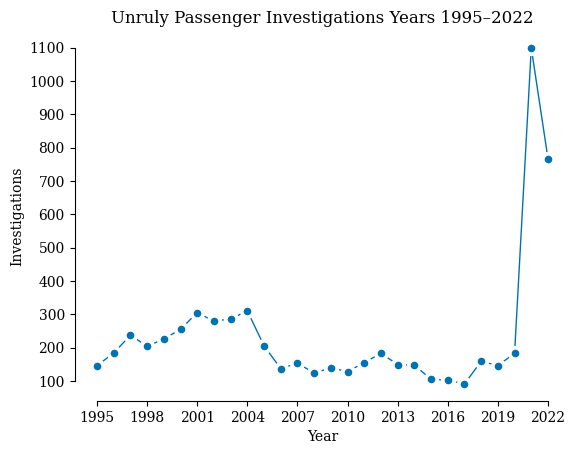

In [81]:
plt.rcParams['font.family'] = 'serif'

x = df_unruly['year']
y = df_unruly['investigations initiated']

fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-', color="#0072B2", linewidth=1, zorder=1)
ax.scatter(x, y, color='white', s=100, zorder=2)
ax.scatter(x, y, color="#0072B2", s=20, zorder=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_bounds(1995, 2022)
ax.spines['left'].set_bounds(100, 1100)

x_ticks = list(range(min(x), max(x)+1, 3))
y_ticks = list(range(100, 1200, 100))
ax.xaxis.set_ticks(x_ticks)
ax.yaxis.set_ticks(y_ticks)

ax.set_title('Unruly Passenger Investigations Years 1995–2022')
ax.set_xlabel('Year')
ax.set_ylabel('Investigations')